<a href="https://colab.research.google.com/github/anadiedrichs/time-series-analysis/blob/master/intro_time_series_valores_perdidos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad valores perdidos - Unidad análisis de series temporales - Teleinformática IoT - 2019

**Docente: Ing. Ana Laura Diedrichs**

Consultas: lunes 19 hs en sala consulta de sistemas.

Contacto por otros horarios de consulta o dudas: 
* Email: ana.diedrichs@frm.utn.edu.ar
* Telegram  @anadiedrichs

## Objetivos del laboratorio:

* Analizar una serie temporal para un problema específico
* Fomentar el trabajo en clase, discusión y aportes de soluciones entre los participantes
* Ser una entrada en calor o introducción del uso del entorno colab.research.google.com y librerías Python como pandas

## Pre-requisitos o pre-condiciones
* Tener una cuenta google (gmail)
* Tener instalado el navegador google chrome 
* Contar con conectividad a Internet

## Entrega y uso del laboratorio

**USO**

* Antes que cualquier cosa, **cree una copia de este notebook: Click en *File*, luego *Save a Copy in Drive***
* Renombre el archivo con el siguiente formato: APELLIDO_NOMBRE_LEGAJO_titulonotebook.ipynb 
Ejemplo: DIEDRICHS_ANA_99999_proyecto_forma_de_onda_2019.ipynb
* Use el notebook, complete las actividades y consignas que se elija. 
* Este laboratorio es una actividad individual.
* Se fomenta el intercambio de opiniones en clase y exposición.

**ENTREGA**

* Una vez finalizado el laboratorio, complete [el formulario de entrega](https://forms.gle/zUnbfN79YEEeJFz7A) indicando
 * Apellido
 * Nombre
 * Nro Legajo
 * Carrera
 * Actividad (cuál laboratorio o actividad)
 * link de su notebook. El mismo se obtiene si realiza click en *Share* (esquina superior derecha) y luego en *Get shareable link* 
 
 
 No se aceptarán otras formas de entrega distintas a la mencionada.
 
 Fecha límite de entrega: 10 de octubre de 2019.

# Missing values (valores perdidos)



## Valores perdidos, missing values


¿qué realizan los siguientes bloques de código?

In [0]:
import pandas as pd
df = pd.DataFrame({'date': pd.date_range(start='2013-01-01', periods=10, freq='H'), 'value': range(10)})
df.loc[2:3, 'value'] = np.nan
df.loc[6, 'value'] = np.nan
df

,date,value
0,2013-01-01 00:00:00,0.0
1,2013-01-01 01:00:00,1.0
2,2013-01-01 02:00:00,NaN
3,2013-01-01 03:00:00,NaN
4,2013-01-01 04:00:00,4.0
5,2013-01-01 05:00:00,5.0
6,2013-01-01 06:00:00,NaN
7,2013-01-01 07:00:00,7.0
8,2013-01-01 08:00:00,8.0
9,2013-01-01 09:00:00,9.0


In [0]:
df['value'].interpolate(method='linear', inplace=True)
df

,date,value
0,2013-01-01 00:00:00,0.0
1,2013-01-01 01:00:00,1.0
2,2013-01-01 02:00:00,2.0
3,2013-01-01 03:00:00,3.0
4,2013-01-01 04:00:00,4.0
5,2013-01-01 05:00:00,5.0
6,2013-01-01 06:00:00,6.0
7,2013-01-01 07:00:00,7.0
8,2013-01-01 08:00:00,8.0
9,2013-01-01 09:00:00,9.0


Ejecute los siguientes bloques de códigos y comente, ¿cuál es la diferencia entre el método bkfill y ffill y de ambos con interpolate?, 

In [0]:
time_index = pd.date_range('01/01/2010', periods=5, freq='M')

# Create data frame, set index
df = pd.DataFrame(index=time_index)

# Create feature with a gap of missing values
df['Sales'] = [1.0,2.0,np.nan,np.nan,5.0]
df


,Sales
2010-01-31,1.0
2010-02-28,2.0
2010-03-31,NaN
2010-04-30,NaN
2010-05-31,5.0


In [0]:
df.interpolate(method="linear")

,Sales
2010-01-31,1.0
2010-02-28,2.0
2010-03-31,3.0
2010-04-30,4.0
2010-05-31,5.0


In [0]:
df.ffill()

In [0]:
df.bfill()

In [0]:
N = 50 
time_index = pd.date_range('01/01/2010', periods=N, freq='H')
# Create data frame, set index
df2 = pd.DataFrame(index=time_index)
x = np.linspace(0, 2*np.pi, N)
y = np.sin(x)
# Create feature with a gap of missing valuesH
df2['value'] = y  # [1.0,2.0,np.nan,np.nan,5.0]
df2.loc[2:3, 'value'] = np.nan
df2.loc[6:10, 'value'] = np.nan
df2.loc[22:33, 'value'] = np.nan
df2.loc[46:50, 'value'] = np.nan
df2



In [0]:
time_index = pd.date_range('01/01/2010', periods=N, freq='H')
dfcomparacion = pd.DataFrame(index=time_index)
# Create feature with a gap of missing valuesH
dfcomparacion['real'] = y  # [1.0,2.0,np.nan,np.nan,5.0]
dfcomparacion['missing'] = y  # [1.0,2.0,np.nan,np.nan,5.0]
dfcomparacion.loc[2:3, 'missing'] = np.nan
dfcomparacion.loc[6:10, 'missing'] = np.nan
dfcomparacion.loc[22:33, 'missing'] = np.nan
dfcomparacion.loc[46:50, 'missing'] = np.nan

dfcomparacion.head()

,real,missing
2010-01-01 00:00:00,0.000000,0.000000
2010-01-01 01:00:00,0.127877,0.127877
2010-01-01 02:00:00,0.253655,NaN
2010-01-01 03:00:00,0.375267,0.375267
2010-01-01 04:00:00,0.490718,0.490718


In [0]:
dfcomparacion['interpolacion'] = dfcomparacion['missing'].interpolate(method="linear")
dfcomparacion['int2'] = dfcomparacion['missing'].interpolate(method="time")

dfcomparacion

,real,missing,interpolacion,int2
2010-01-01 00:00:00,0.000000e+00,0.000000,0.000000,0.000000
2010-01-01 01:00:00,1.278772e-01,0.127877,0.127877,0.127877
2010-01-01 02:00:00,2.536546e-01,NaN,0.251572,0.251572
2010-01-01 03:00:00,3.752670e-01,0.375267,0.375267,0.375267
2010-01-01 04:00:00,4.907176e-01,0.490718,0.490718,0.490718
2010-01-01 05:00:00,5.981105e-01,0.598111,0.598111,0.598111
2010-01-01 06:00:00,6.956826e-01,NaN,0.670222,0.670222
2010-01-01 07:00:00,7.818315e-01,NaN,0.742333,0.742333
2010-01-01 08:00:00,8.551428e-01,NaN,0.814445,0.814445
2010-01-01 09:00:00,9.144126e-01,NaN,0.886556,0.886556


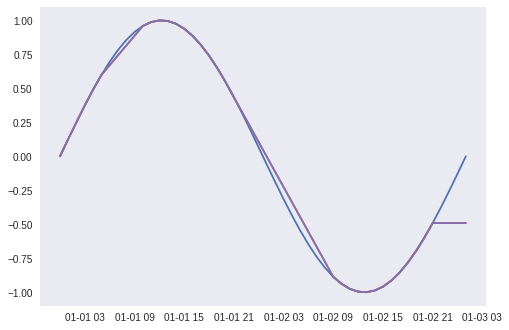

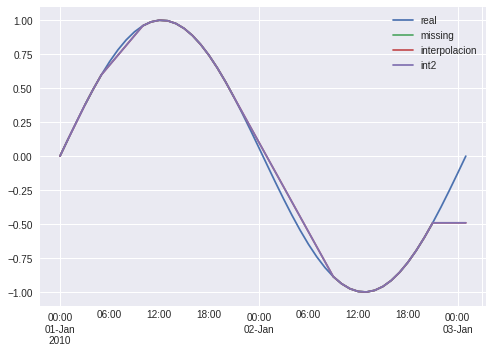

In [0]:
plt.plot(dfcomparacion)
plt.grid()
plt.show()
dfcomparacion.plot()